<h1>Classification of Blog Sites According to Topics Through Webscraping & NLP: A Preliminary Attempt</h1>

<h2> A Short Introduction About Who I am and Why I Prepared This Jupyter Notebook </h2>

<br> </br> Hello, I am Marketa Ince. As a person looking for opportunities to work as a Data Analyst (or maybe Scientist?), I would like to use any chance to improve my skills. Provided that we have a long weekend at the time of preparation of this notebook due to PinksterMaandag, I decided to use these days at home to develop my skills in WebScraping and NLP. 
<br> </br>
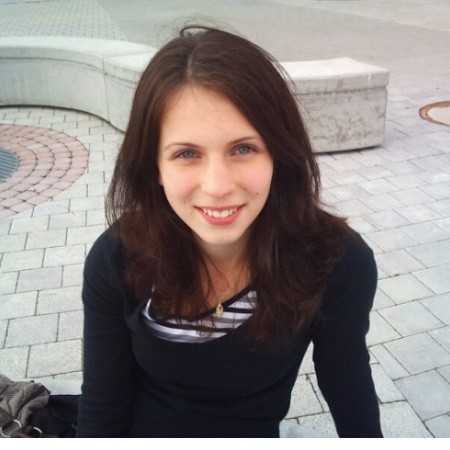
<br> </br>
With the advice of my husband, who is a data scientist himself, I decided to take these two courses from DataCamp:

1. Natural Language Processing Fundamentals in Python
<br> </br> https://www.datacamp.com/courses/natural-language-processing-fundamentals-in-python
2. Machine Learning with the Experts: School Budgets (Classification based on text data)
<br> </br> https://www.datacamp.com/courses/machine-learning-with-the-experts-school-budgets

And after that I decided to come up with a quick project to put my fresh skills into practice immediately. So, let's dive into it.

<h2> A Short Introduction To This Project </h2>

In this project, I attempt to develop a topic identification algorithm which is capable of predicting which of the five different categories a blog page corresponds to. Basically, it classifies the blog pages according to their topics which are:

<b>1.</b> Soccer <br> </br>
<b>2.</b> Beauty <br> </br>
<b>3.</b> Economics <br> </br>
<b>4.</b> Science <br> </br>
<b>5.</b> Music <br> </br>

Initially, I planned this project in three stages however you will currently find only two of them in this notebook. These stages are:

<h3><b>Stage 1:</b> Webscaping and Calculating Word Frequencies in the Text</h3>
<br> </br>
This project starts with webscraping text from a health blog which is about "100 most inspirational weight loss bloggers". I have used Beautifulsoup and some basic cleaning techniques to get rid of the unwanted pieces of text from our text data including punctuation, HTML tags, stopwords(i.e. words that are frequently used in the language e.g. "and"). I have also applied some further preprocessing by lowercasing all the letters and stemming the words through WordNet Lemmatizer. In other words, I have manually a bag of words and then I calculated term frequencies manually. I am well aware that there are ways to do this automatically using nltk or other packages like gensim, however I decided to do more practice with the pandas dataframes. A the end of this stage, you can find a term frequency graph demonstrating which words are important for this blog page. 

<h3><b>Stage 2:</b> Automatized Webscraping & Developing An Initial Logistic Regression Model  </h3>
<br> </br>

I started this stage with writing a function "prepare()" which is capable of realizing cleaning and preparation steps automatically. I decided to apply this function on webscraped data from 630 blog pages. This is the part where things got tricky because I had problems with servers that refused the connection. As of now (at the time of writing this part of this document) I am still trying to make this step run with a new idea which seems to be going good. However, I had the rest of the code laid out, so I will explain. This webscrapped and cleaned data will be a list that contains 630 lists, each of which corresponds to one blog page. This text data will be the input data for this predictive model, where I used Multi Class Logistic Regression as my supervised learning algorithm. Before sending the data to the learning algorithm, they are converted to Word Vectors using two different type of vectorizers: CountVectorizer and TfidfVectorizer. I prepared two different pipelines to run these vectorizers before the ML and in the end, I compared the performance of these two algorithms through accuracy metric.

<h3><b>Stage 3:</b> Comparison of the Performance of Several ML Algorithm-Vectorizer Combinations </h3>
<br> </br>
I have not done this yet however, it is planned to be as follows: There will be many more pipelines like the two pipelines mentioned in Stage 2 which will try different ML Algorithm-Vectorizer combinations,e.g. Random Forest Classifier + Hashing Vectorizer or K Neighbours Classifier + TfidfVectorizer. Then the performance of the models will be compared in terms of accuracy. The results will be visualized in several different nice looking Seaborn plots to demonstrate the results of this preliminary work.

<h2>Stage 1: Webscaping and Calculating Word Frequencies in the Text </h2> 

Let's start by sending a get request using Requests package. Then, we will create our soup from the html document and get the text.Here are the steps that we follow in Stage 1:

<b>1. </b>Download & webscaping<br></br>
<b>2. </b>Cleaning Data<br></br>
<b>3. </b>Preparation of Data<br></br>
<b>4. </b>Construction of a Word Frequency Dataframe<br></br>
<b>5. </b>Plotting this DataFrame<br></br>

In [ ]:
# Download the webpage using Requests package. requests.get(url) returns you a Response object

import requests
url="https://diettogo.com/blog/100-most-inspirational-weight-loss-bloggers-2013"
r = requests.get(url)

# Extract HTML from Response object
    
html = r.text

# BeautifulSoup extracts text out of HTMl and creates a soup "pagesoup"

from bs4 import BeautifulSoup
pagesoup = BeautifulSoup(html, 'html.parser') 

# Get the text out of the "pagesoup" and store it in "text

text = pagesoup.get_text() 

In [ ]:
# CLEANING DATA: In this part, text is extracted out of the HTML of the webpage.
# For defining patterns, regular expressions (regex) is very useful. We do it with re package. 

import re

# Using re package, Tags are removed here. 

cleanr = re.compile('<.*?>')
cleantext = re.sub(cleanr, '', text)

# In this text, the beginning and the ending part has some unwanted clutter left from HTML. 
# The first split helps to get rid of the clutter in the beginning of the file whereas the second one helps for the second.

uncluttered=cleantext.split("\r\n-------------------------------------------\n\r\n")[1].split("\n\nDid you make the list?")[0]

# Some additional unnecessary patterns from the text are cleaned here.
# Here we use a very basic regular expression as a pattern to remove.

cleaningpattern="\r|\n|\t|\xa0|\n1|.com"
cleaned_and_uncluttered=re.sub(cleaningpattern, '', uncluttered)

# Here punctuation is cleaned.

import string
exclude = set(string.punctuation)
nopunc = ''.join([ch for ch in cleaned_and_uncluttered if ch not in exclude])

# Commonly used words such as "and,or" are known as stopwords and they don't help our aim of text identification.
# Here, we exclude them from our text.
        
import nltk
stop = nltk.corpus.stopwords.words('english')

word_list = []
for word in nopunc.split():
    if word not in stop:
        word_list.append(word)

# We will finally filter the non-English words and other stuff using a dictionary.
# For this, we will use the dictionary of nltk

import nltk
from nltk.corpus import words
dictionary=nltk.corpus.words.words()

throw=[]
for i in word_list:
    if i not in dictionary:
        throw.append(i)

bow=[x for x in word_list if x not in throw]

In [ ]:
#PREPARATION OF DATA 

# Now that we have cleaned our text (as much as we could), we should prepare it for future analysis.
# First, we convert our list to a string and we lower

word_list_lowercase=[x.lower() for x in bow]

# Second, we would like to get the root of words,i.e. we would like to lemmatize each word.
# We will use WordNetLemmatizer from nltk.stem for this

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

finalbow=[]
for i in word_list_lowercase:
    finalbow.append(wordnet_lemmatizer.lemmatize(i))
    
# "finalbow" list contains the bag of words that we have obtained from this text

In [ ]:
# CONSTRUCTION OF A WORD FREQUENCY DATAFRAME

# In this part we will create a pandas dataframe using our bow list.
# For this purpose, we need to import "Counter" function from collections module.

import pandas as pd
from collections import Counter

# Construct the dataframe

df=pd.DataFrame([Counter(finalbow)]).transpose()

# Rename the index and the single column in the df.

df.index.name="Words"
df.columns=["Occurence"]

# We need to sort this dataframe in a descending manner using "ascending=False"

df.sort_values(by="Occurence",ascending=False,inplace=True)

In [ ]:
# VISUALIZATION OF WORD FREQUENCIES

# For plotting,we will use matplotlib and seaborn packages.
# While Matplotlib is enough for basic plotting, Seaborn is nice to have for better customization options.

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid") 
sns.set()

df.plot(kind="bar",color="red") 
plt.xticks(rotation=-45)
plt.title("The top 20 words and their frequencies")
plt.xlabel("Words")
plt.ylabel("Frequency of Words")
plt.margins(1)
plt.xlim([-0.5,20.5])
plt.ylim([0,150])
plt.show()

<h2>Stage 2: Classification of Topics In Websites: A Logistic Regression Model </h2> 

<h3>CountVectorizer Vs. TfidfVectorizer</h3>

Since we would like our model to work for large number of webpages, it will be great if we automatize the cleaning and preparation processes mentioned in <b>Stage 1</b> in a function. Then, this function will help us do mass web scraping and cleaning. Next, we will prepare our input for CountVectorizer and TfidfVectorizer. In the last part, we will create pipelines for the application of Logistic Regression along with <b> CountVectorizer </b> and <b> TfidfVectorizer </b>. We will compare the performances of both methods through accuracy.

Here is my roadmap in Stage 2:

<b>1. </b>Write a function that does cleaning and preparing data<br></br>
<b>2. </b>Webscrape 5 pages to get blog page adresses. <br></br>
<b>3. </b>Use these adresses to webscape hundreds of blog pages.<br></br>
<b>4. </b>Convert the text data to dataframes and label them <br></br>
<b>5. </b>Write two pipelines for the predictive models.<br></br>

In [ ]:
# I discovered that servers refuse my connections if there are too many requests.
# I decided to use the sleep function to put delays for requests from server to overcome this problem.

from time import sleep

In [ ]:
# THE FUNCTION FOR CLEANING AND PREPARING DATA

import time
def prepare(url):
    """This function gets the html and applies almost all the steps shown in the first part of the code.""" 
    
    #I implemented this while loop to overcome the connection refusal issue. Hope that it works.
    page = ''
    while page == '':
        try:
            t0 = time.time()
            headers = {"User-Agent": "Hi I am Marketa.I am testing a webscraping algorithm from blogs,doing nothing harmful. In case of an issue, please contact me at marketa.stepanova1@gmail.com. Thanks for your understanding."}
            page = requests.get(url,headers=headers)
            response_delay = time.time() - t0
            time.sleep(10*response_delay)  # wait 10x longer than it took them to respond
            break
        except:
            print("Connection refused by the server..")
            print("Let me sleep for 10 seconds")
            print("ZZzzzz...")
            time.sleep(10)
            print("Was a nice sleep, now let me continue...")
            continue
            
    html = r.text
    pagesoup = BeautifulSoup(html, 'html.parser') 
    text = pagesoup.get_text()
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', text)
    cleaningpattern="\r|\n|\t|\xa0|\n1"
    cleaned=re.sub(cleaningpattern, '', cleantext)
    nopunc = ''.join([ch for ch in cleaned if ch not in exclude])
    stop = nltk.corpus.stopwords.words('english')
    
    word_list = []
    for word in nopunc.split():
        if word not in stop:
            word_list.append(word)
    word_list_lowercase=[x.lower() for x in word_list]
    wordnet_lemmatizer = WordNetLemmatizer()

    almostready=[]
    for i in word_list_lowercase:
        almostready.append(wordnet_lemmatizer.lemmatize(i))
            
    throw=[]
    for i in almostready:
        if i not in dictionary:
            throw.append(i)

    bow=[x for x in almostready if x not in throw] 
        
    return bow

In [ ]:
# PREPARATION OF DATA: WEBSCRAPING BLOGS

# We have 5 lists of blogs consisting of several topics. Each page has roughly 100 blogs or more.
# We will webscape these 5 pages to get the page names for the 630 blog pages which will form our dataset.

topsoccerblogs="https://blog.feedspot.com/soccer_blogs/"        #130 top soccer blogs
topbeautyblogs="https://blog.feedspot.com/beauty_blogs/"        #114 top beauty blogs
topeconomicsblogs="https://blog.feedspot.com/economics_blogs/"  #102 top economics blogs
topscienceblogs="https://blog.feedspot.com/science_blogs/"      #99  top science blogs
topmusicblogs="https://blog.feedspot.com/music_blogs/"          #185 top music blogs

blogs=[topsoccerblogs,topbeautyblogs,topeconomicsblogs,topscienceblogs,topmusicblogs]

aclasslist=[]
listofblogs=[]
for urlblog in blogs:
    r = requests.get(urlblog)
    html = r.text
    pagesoup = BeautifulSoup(html, "html5lib")  
    a=pagesoup.body.find_all("p",class_="trow trow-wrap")
    alist=list(a)  
    for i,value in enumerate(alist):
        aclasslist.append(alist[i].find("a",class_="ext"))
        for m in aclasslist[i]:
            listofblogs.append(m)

# "listofblogs" contains all the blog adresses.

In [ ]:
# We need to add "http://" to the web page adresses, otherwise we will have trouble.

blogdocshtml=["http://"+i for i in listofblogs]

<h2> Mass Webscraping: Be Very Cautious before running this. Check everything. Probably decrease the number of requests.</h2> 

<p> # This is a lengthy operation that might take hour(s).
# Unfortunately up to now, I was not able to make this work. Very probably I am trying to send too many connections to the server </p>

In [ ]:
# This line starts webscaping and cleaning from 630 pages.

blogdocs=[prepare(i) for i in blogdocshtml]

In [ ]:
# ERROR MESSAGES WHILE SCRAPING

# I got the following error message in my earlier attempts to scrape 630 pages.

# ConnectionError: HTTPConnectionPool(host='kopworld.net', port=80): 
# Max retries exceeded with url: / 
# (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x00000159A9BC7B00>:
# Failed to establish a new connection: [WinError 10060] 
# Een verbindingspoging is mislukt omdat de verbonden party niet correct heeft geantwoord na een 
# bepaalde tijd, of de gemaakte verbinding is mislukt omdat de verbonden host niet heeft geantwoord',))

In [ ]:
# PREPARATION OF WEBSCRAPED INPUT FOR MACHINE LEARNING PIPELINES

# Preparation of X = Initial Input Variable 

# Here the bag of words obtained in the form of list of lists will be converted to 1 list
# where each string will correspond to one website

blogdocsastexts=[]
for i in blogdocs:
    blogdocsastexts.append(' '.join(i))

# This list is converted into a dataframe

dfx = pd.DataFrame(blogdocsastexts, columns=["Text"])

In [ ]:
# Preparation of y = The Target Variable

# This vector consists of the type of blogs 

# Here are what numbers correspond to within the target variable y
# 0:Sports
# 1:Beauty 
# 2:Economics
# 3:Science 
# 4:Music

def list_maker(n,i):
    finallist = [i] * n
    return finallist

noofblogs=[130,114,102,99,185]
ylistoflist=[]

for i in range(0,5):
    ylistoflist.append(list_maker(noofblogs[i],i))

ylist = [item for sublist in ylistoflist for item in sublist]

# We form a DataFrame from the ylist. We apply "get_dummies()" to do OneHotEncoding 
# which is necessary for categorical variables like this one.

dfy=pd.DataFrame([ylist]).transpose().get_dummies()

In [ ]:
# SPLITTING TRAINING AND TEST SET  

from sklearn.model_selection import multilabel_train_test_split

# No OneHotEncoder needed as y variables are defined as such. 

X_train, X_test, y_train, y_test = multilabel_train_test_split(dfx,dfy,test_size=0.25,random_state=2)

In [ ]:
# LOGISTIC REGRESSION + COUNTVECTORIZER
# Here is where we run our Logistic Regression Classifier with CountVectorizer

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier


pl = Pipeline([("vectorizer",CountVectorizer()),
               ('clf', OneVsRestClassifier(LogisticRegression()))])
 
pl.fit(X_train, y_train)
accuracycountvectorizer = pl.score(X_test, y_test)
print('Accuracy of the Logistic Regression Model with CountVectorizer ', accuracycountvectorizer)

In [ ]:
# LOGISTIC REGRESSION + TFIDFVECTORIZER
# Here is where we run our Logistic Regression Classifier with TfIdfVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

pl = Pipeline([("vectorizer",TfidfVectorizer()),
               ('clf', OneVsRestClassifier(LogisticRegression()))])
 
pl.fit(X_train, y_train)
accuracytfidfvectorizer = pl.score(X_test, y_test)
print('Accuracy of the Logistic Regression Model with TfidfVectorizer ', accuracytfidfvectorizer)

In [ ]:
if accuracycountvectorizer > accuracytfidfvectorizer:
    print("Countvectorizer performs better than TfidfVectorizer")
    else:
    print("TfidfVectorizer performs better than Countvectorizer")